<a href="https://colab.research.google.com/github/Malbasahi/Customer_Segmentation_Analysis/blob/main/Customer_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

In [2]:
# Load your customer data (replace 'Online Retail.csv' with your dataset)
data = pd.read_csv('/content/Online_Retail.csv', encoding='latin1')

In [3]:
# Display the first few rows of the dataset
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
# 1. Summary Statistics
print(data.describe())

           Quantity     UnitPrice    CustomerID
count  24744.000000  24743.000000  16041.000000
mean       7.282291      7.101456  15575.548594
std       70.761256    181.851940   1789.350954
min    -9360.000000      0.000000  11323.000000
25%        1.000000      1.450000  14135.000000
50%        2.000000      2.510000  15658.000000
75%        6.000000      4.250000  17223.000000
max     2880.000000  13541.330000  32422.000000


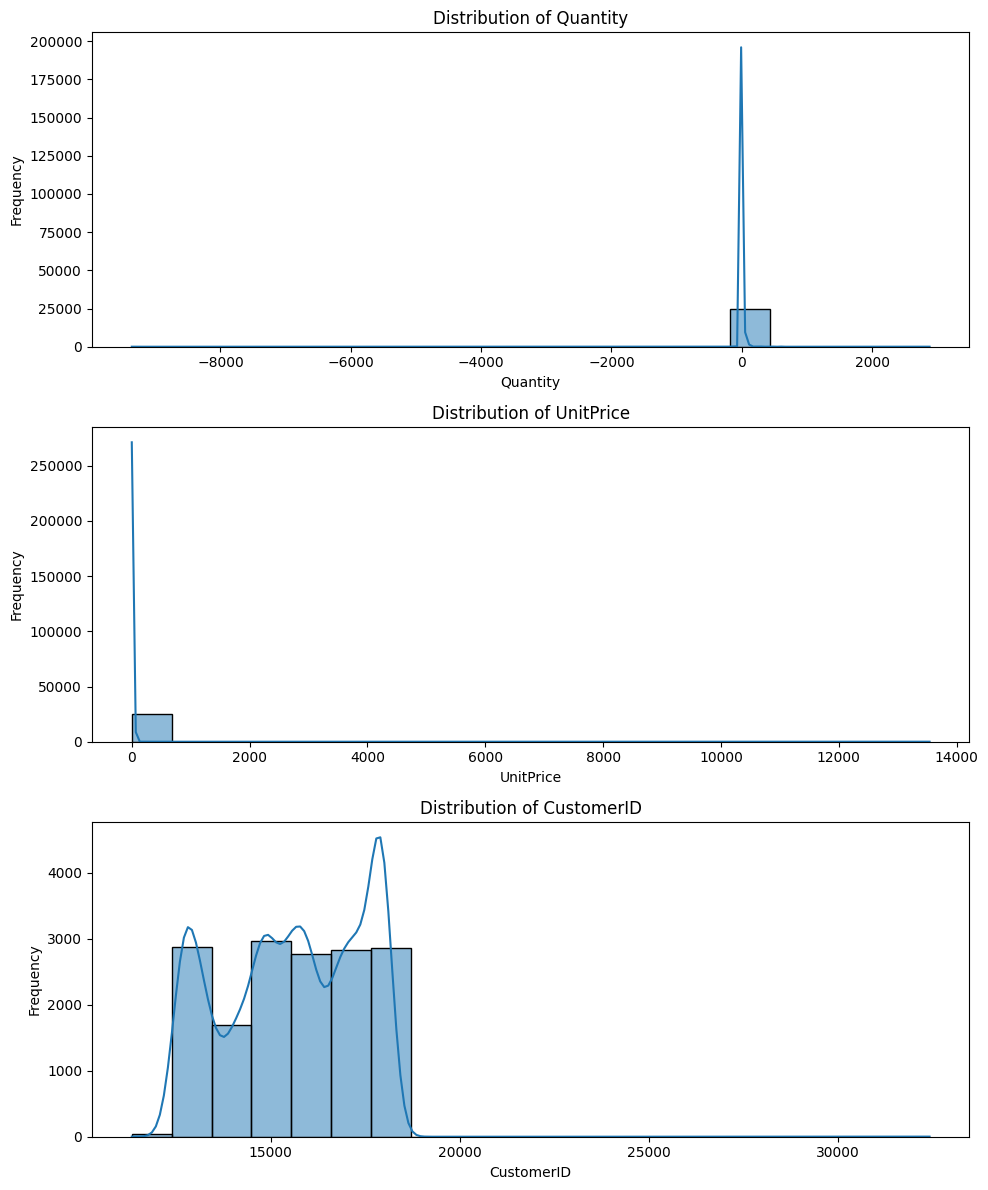

In [5]:
# Define the features to visualize (exclude non-numeric columns)
numeric_features = ['Quantity', 'UnitPrice', 'CustomerID']

# Set up subplots
fig, axes = plt.subplots(len(numeric_features), 1, figsize=(10, 12))

# Plot distributions for each numeric feature
for i, feature in enumerate(numeric_features):
    ax = axes[i]
    sns.histplot(data=data, x=feature, ax=ax, bins=20, kde=True)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

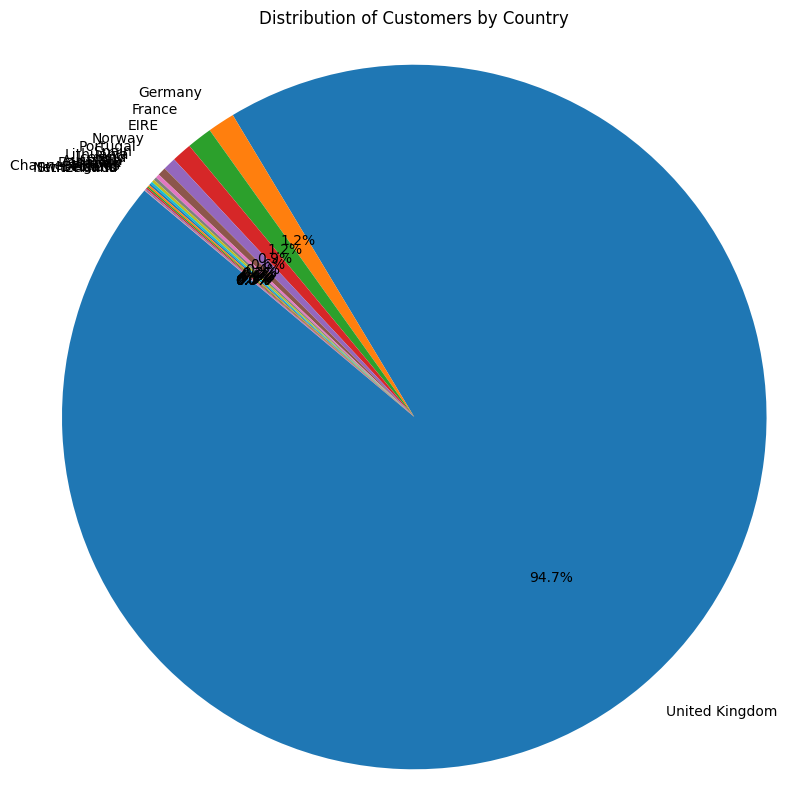

In [6]:
# Group the data by 'Country' and count the number of occurrences for each country
country_counts = data['Country'].value_counts()

# Create a figure for the pie chart and set its size
plt.figure(figsize=(10, 10))

# Plot the pie chart with the following settings:
plt.pie(
    country_counts,             # Values to be plotted
    labels=country_counts.index,  # Labels for each slice (country name)
    autopct='%1.1f%%',           # Display percentages with one decimal place
    startangle=140               # Start angle for the first slice (rotates the chart)
)

# Set the title for the pie chart
plt.title('Distribution of Customers by Country')

# Ensure that the pie chart is drawn as a circle
plt.axis('equal')

# Display the pie chart
plt.show()

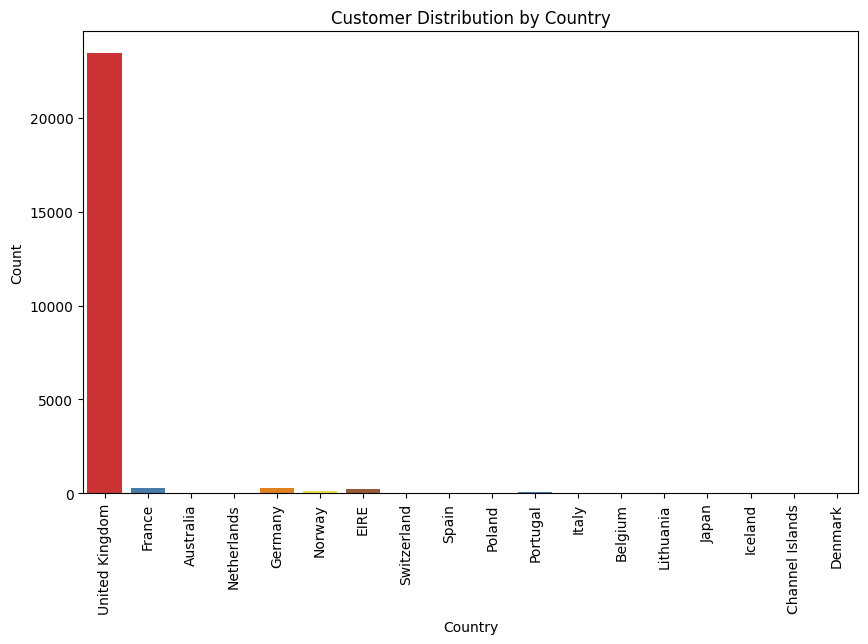

In [7]:
# Bar Chart for Categorical Data (e.g., Country)
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Country', palette='Set1')
plt.title('Customer Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

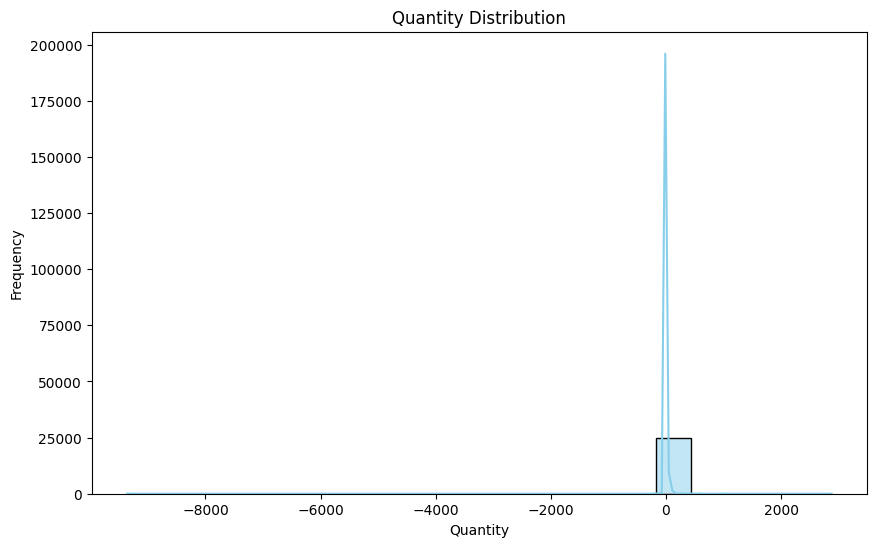

In [8]:
# Histogram for Numerical Data (e.g., Quantity)
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Quantity', bins=20, kde=True, color='skyblue')
plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

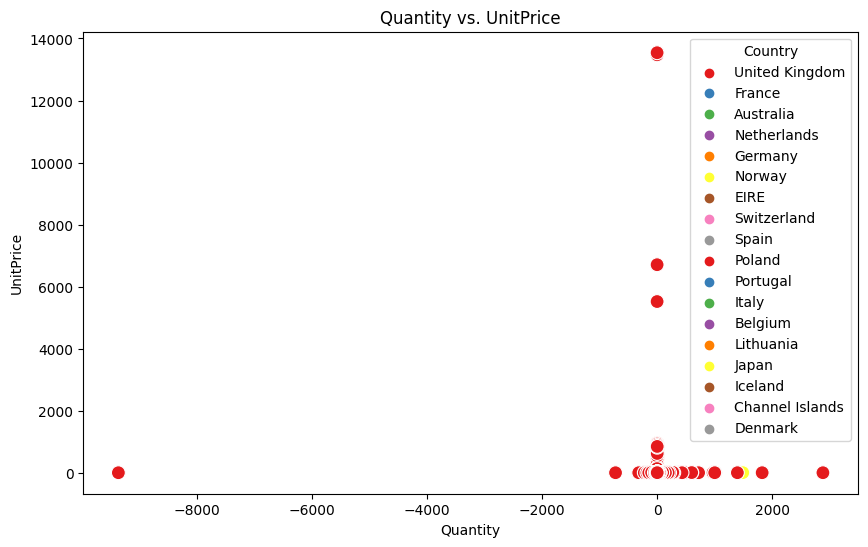

In [9]:
# Scatter Plot for Two Numerical Variables (e.g., Quantity vs. UnitPrice)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Quantity', y='UnitPrice', hue='Country', palette='Set1', s=100)
plt.title('Quantity vs. UnitPrice')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.legend(title='Country')
plt.show()

In [10]:
# Convert 'Quantity' column to numeric, handle non-numeric values
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')

In [11]:
# Remove rows with missing or non-numeric 'Quantity'
data = data.dropna(subset=['Quantity'])

In [12]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')

In [13]:
# Drop irrelevant columns if needed
data = data.drop(['CustomerID', 'Country'], axis=1)

# Handle missing values if any
data = data.dropna()

In [14]:
# Select only numeric columns
numeric_columns = data.select_dtypes(include=[np.number])

# Standardize numeric features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_columns)

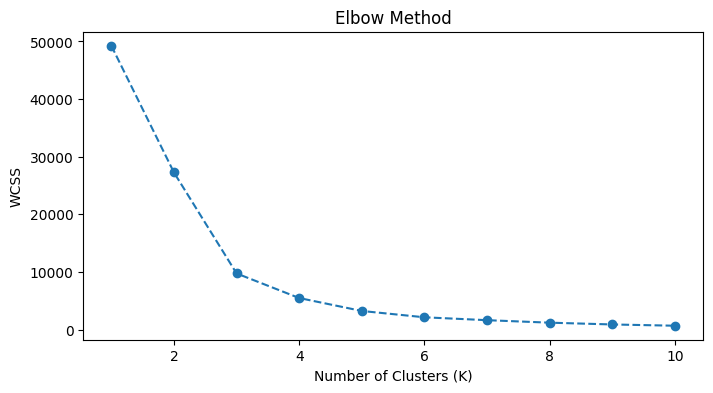

In [15]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()


In [16]:
# Choose the optimal K value (e.g., 4 in this case)
optimal_k = 4

# Fit K-Means clustering with the optimal K
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(data_scaled)

# Add cluster labels to the original dataset
data['Cluster'] = cluster_labels

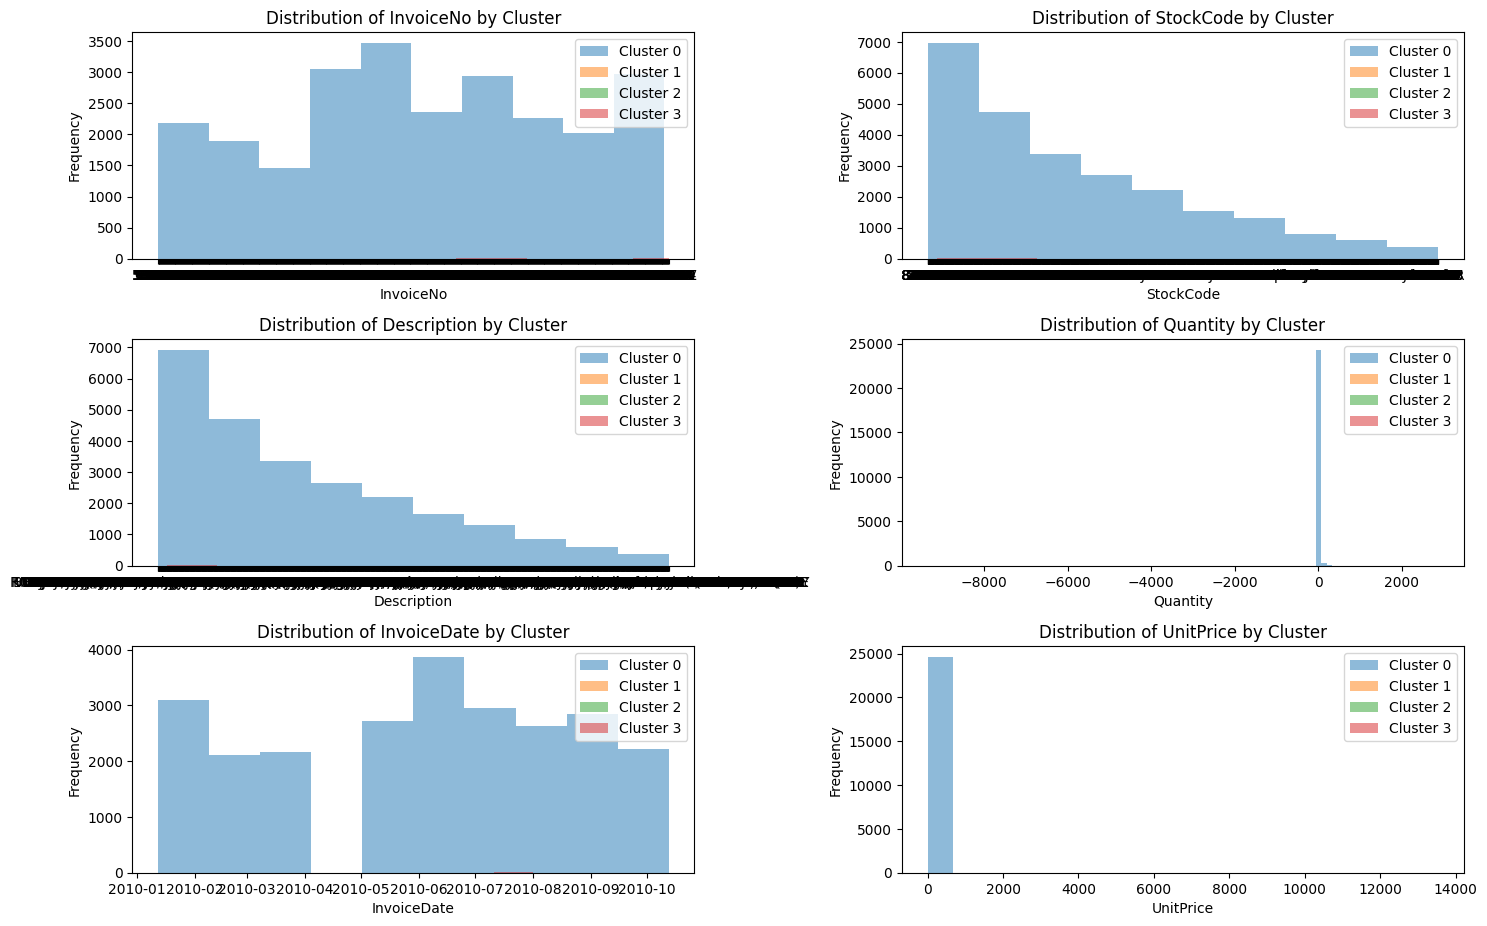

In [17]:
# Determine the number of rows and columns for subplots
num_cols = 2  # Number of columns for subplots
num_rows = (len(data.columns) - 1) // num_cols + 1  # -1 to exclude 'Cluster' column

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Exclude 'YearMonth' column from the loop
columns_to_plot = [column for column in data.columns[:-1] if column != 'YearMonth']

for i, column in enumerate(columns_to_plot):  # Exclude 'Cluster' column
    ax = axes[i]
    for j in range(optimal_k):
        ax.hist(data[data['Cluster'] == j][column], alpha=0.5, label=f'Cluster {j}')
    ax.set_title(f'Distribution of {column} by Cluster')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.legend()

# Hide any empty subplots
for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


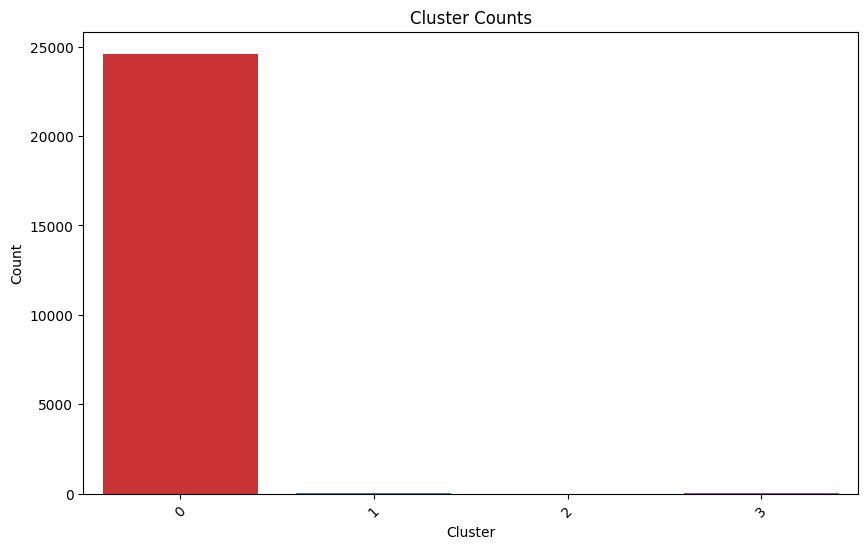

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Cluster', palette='Set1')
plt.title('Cluster Counts')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Overall Silhouette Score: 0.99


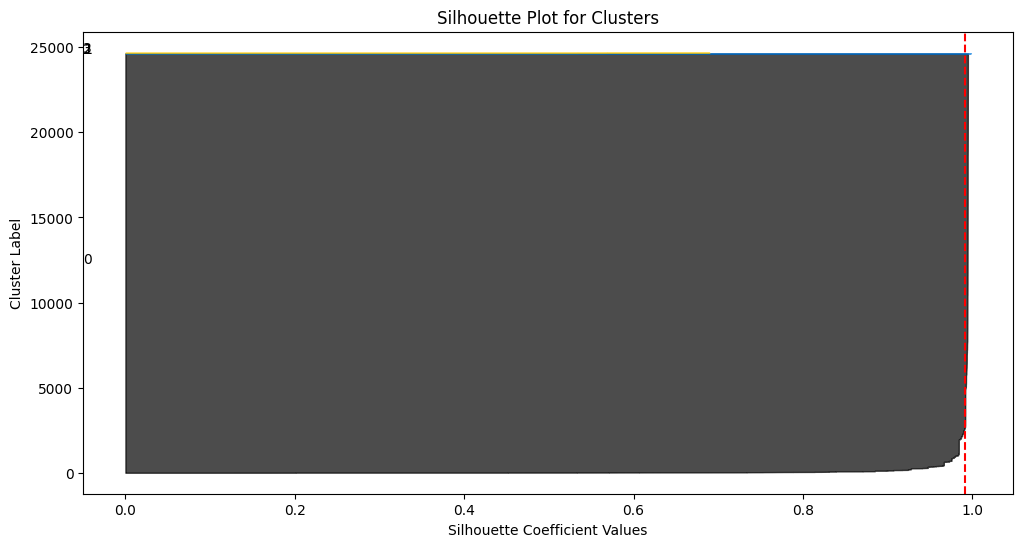

In [19]:
# Calculate silhouette score for the entire dataset
silhouette_avg = silhouette_score(data_scaled, cluster_labels)
print(f"Overall Silhouette Score: {silhouette_avg:.2f}")

# Calculate silhouette scores for each sample
sample_silhouette_values = silhouette_samples(data_scaled, cluster_labels)

# Create a subplot with a distinct color for each cluster
plt.figure(figsize=(12, 6))

y_lower = 10
for i in range(optimal_k):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / optimal_k)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.title("Silhouette Plot for Clusters")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")

# The vertical line represents the average silhouette score
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.show()